# Self-study try-it activity 1.1: Optimisation essentials 


This notebook explores essential concepts in machine learning:

1. **Gradient descent algorithm**: Gradient descent is an optimisation algorithm that iteratively adjusts model parameters to minimise a loss function by moving in the direction of the steepest descent.
   
2. **Loss functions**: A loss function (also called a cost function or an objective function) measures the difference between/ quantifies the error or cost between the predicted values of a model and the actual values.

3. **Activation functions**: Activation functions are mathematical tools applied to neural network outputs to introduce non-linearity, enabling networks to learn complex patterns.

4. **Regularisation techniques**: Regularisation in machine learning is a technique to prevent overfitting by adding a penalty to the model's complexity, ensuring it learns general patterns rather than memorising noise, thereby improving its performance on unseen data.


## Gradient descent algorithm

In this activity, we will discuss the gradient descent algorithm, which is given by: 

$$
\theta = \theta - \nabla J(\theta)
$$


Gradient descent updates the parameter $\theta$ by subtracting the derivative of the cost function $J(\theta)$ with respect to $\theta$, guiding the model toward minimising $J$.



In [22]:
#import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt

The gradient of the function is $f'(x) = 2(x - 3)$. We update the value of $x$ by moving in the direction opposite to the gradient.

In this case, the learning rate ($\alpha$) is 0.1.


In [37]:
# Given function: f(x) = (x - 3)^2
# Derivative: f'(x) = 2(x - 3)
# Initial value: x0 = 10
# Learning rate: alpha = 0.1
# Perform 3 iterations

x = 10  # initial guess
alpha = 0.1  # learning rate
iterations = 3  # number of iterations
# Perform gradient descent updates
history = [x]
for _ in range(iterations):
    gradient = 2 * (x - 3)  # Compute derivative f'(x)
    x = x - alpha * gradient  # Update x
    history.append(x)
print(history)

[10, 8.6, 7.4799999999999995, 6.584]


In [ ]:
# Try-it yourself
# Vary the number of iterations to observe how the value of x converges to the minimum
# Modify the learning rate to see how they affect the convergence rate

## Loss functions

In this activity, we will discuss two types of loss functions.

1. **Mean squared error (MSE)**: MSE calculates the average of the squared differences between predicted and actual values.

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$


2. **Cross-entropy loss (log loss)**: It measures the difference between the probability distributions of the predicted and actual categories.

$$
\text{Loss} = -\frac{1}{n} \sum_{i=1}^{n} \left[ y_i \log (\hat{y}_i) + (1 - y_i) \log (1 - \hat{y}_i) \right]
$$



The mean squared error is given by  0.0775


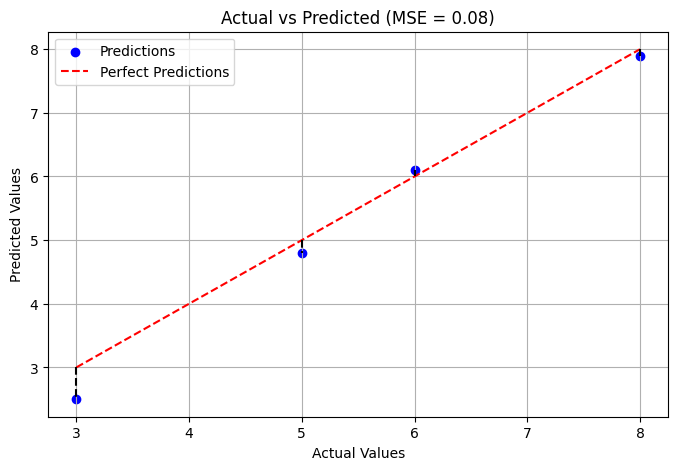

Mean Squared Error (MSE): 0.0775


In [ ]:

# Function to compute MSE
def mean_squared_error(y_true, y_pred):
    """
    Computes the MSE between true and predicted values.
    Parameters:
    y_true (array-like): Actual values
    y_pred (array-like): Predicted values
    Returns:
    float: mean squared error
    """
    return np.mean((y_true - y_pred)**2)


# Example usage
# Regression example (MSE calculation)
y_true = np.array([3, 5, 6, 8])  # Actual values
y_pred = np.array([2.5, 4.8, 6.1, 7.9])  # Predicted values


# Compute MSE
mse = mean_squared_error(y_true, y_pred)

# Print MSE
print("The mean squared error is given by ", mse)

# Plot MSE
# Plot actual vs predicted
plt.figure(figsize=(8, 5))
plt.scatter(y_true, y_pred, color='blue', label='Predictions')
plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='red', linestyle='--', label='Perfect Predictions')

# Annotate errors
for i in range(len(y_true)):
    plt.plot([y_true[i], y_true[i]], [y_true[i], y_pred[i]], 'k--')

# Labels and title
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title(f"Actual vs Predicted (MSE = {mse:.2f})")
plt.legend()
plt.grid(True)
plt.show()

# Print the results
print("Mean Squared Error (MSE):", mean_squared_error(y_true, y_pred))



The cross entropy loss is given by  0.19763488164214868


<ipython-input-12-1e042c306c9e>:11: RuntimeWarning: invalid value encountered in log
  return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))


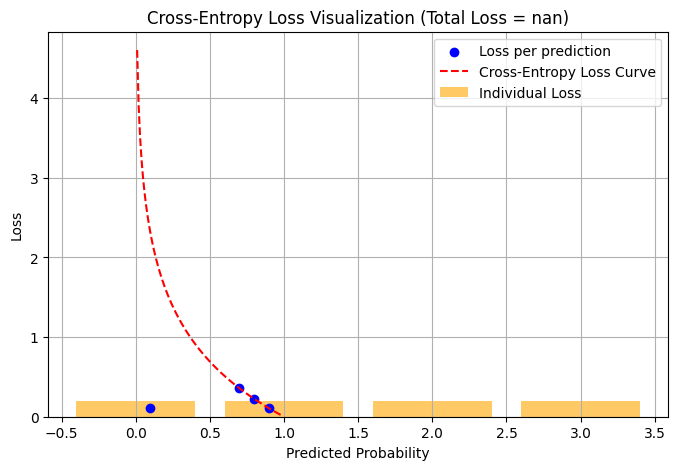

In [ ]:
# Function to compute cross-entropy loss
def cross_entropy_loss(y_true, y_pred):
    """
    Computes the cross-entropy loss for binary classification.
    Parameters:
    y_true (array-like): Actual class labels (0 or 1)
    y_pred (array-like): Predicted probabilities (between 0 and 1)
    Returns:
    float: cross-entropy loss
    """
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# Classification example (cross-entropy loss calculation)
y_true_classification = np.array([1, 0, 1, 1])  # Actual labels (0 or 1)
y_pred_classification = np.array([0.9, 0.1, 0.8, 0.7])  # Predicted probabilities

# Compute cross-entropy loss
cross_entropy = cross_entropy_loss(y_true_classification, y_pred_classification)

# Print cross-entropy
print("The cross entropy loss is given by ", cross_entropy)

# Plot
plt.figure(figsize=(8, 5))

# Scatter plot of predicted probabilities vs. loss
individual_losses = -(y_true_classification * np.log(y_pred_classification) + (1 - y_true_classification) * np.log(1 - y_pred_classification))
plt.scatter(y_pred_classification, individual_losses, color='blue', label='Loss per prediction', zorder=2)

# Line plot showing general loss trend
x_vals = np.linspace(0.01, 0.99, 100)  # Avoid log(0) error
y_vals = - (1 * np.log(x_vals) + (0 * np.log(1 - x_vals)))  # Loss for positive class (y_true=1)
plt.plot(x_vals, y_vals, color='red', linestyle='--', label='Cross-Entropy Loss Curve')

# Bar plot for individual loss values
plt.bar(range(len(y_true)), cross_entropy, color='orange', alpha=0.6, label='Individual Loss')

# Labels and title
plt.xlabel("Predicted Probability")
plt.ylabel("Loss")
plt.title(f"Cross-Entropy Loss Visualization (Total Loss = {cross_entropy_loss(y_true, y_pred):.4f})")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Compute MSE for these values
# Try-it yourself
y_true = np.array([2,4,6,8,10])  # Actual values
y_pred = np.array([2.5, 4.8, 6.1, 7.9, 10.2])  # Predicted values

In [ ]:
# Compute cross-entropy for these values
# Try-it yourself
y_true_classification = np.array([1, 0, 1, 1, 0])  # Actual labels (0 or 1)
y_pred_classification = np.array([0.9, 0.1, 0.8, 0.7, 0.2])  # Predicted probabilities

## Activation function
In this activity, we will discuss two commonly used activation functions.

1. Sigmoidal

$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$


2. ReLU

$$
f(x) = \max(0, x)
$$


In [13]:
import numpy as np

# Define activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

# Given inputs
x_values = np.array([-2, -1, 0, 1, 2])

# Calculate outputs
sigmoid_outputs = sigmoid(x_values)
relu_outputs = relu(x_values)

# Display results
sigmoid_outputs, relu_outputs

(array([0.11920292, 0.26894142, 0.5       , 0.73105858, 0.88079708]),
 array([0, 0, 0, 1, 2]))

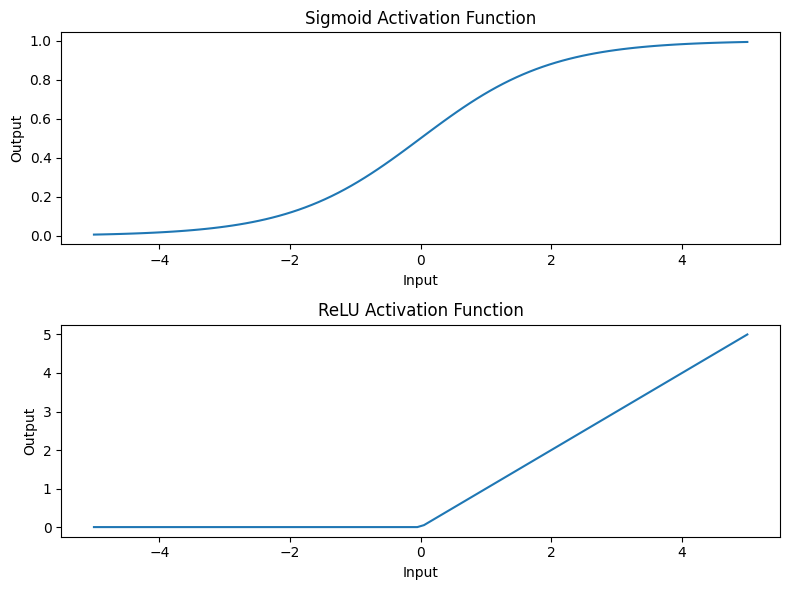

In [15]:
# Generate a range of input values for plotting
x_values = np.linspace(-5, 5, 100)

# Calculate outputs
sigmoid_outputs = sigmoid(x_values)
relu_outputs = relu(x_values)

# Create a figure with two subplots
fig, axs = plt.subplots(2, figsize=(8, 6))

# Plot sigmoid function
axs[0].plot(x_values, sigmoid_outputs)
axs[0].set_title('Sigmoid Activation Function')
axs[0].set_xlabel('Input')
axs[0].set_ylabel('Output')

# Plot ReLU function
axs[1].plot(x_values, relu_outputs)
axs[1].set_title('ReLU Activation Function')
axs[1].set_xlabel('Input')
axs[1].set_ylabel('Output')

# Layout so plots do not overlap
fig.tight_layout()

plt.show()


In [ ]:
#Try it Yourself
array = np.arange(-10, 11)
#For this array create sigmoid and ReLU activation functions.

## Regularisation

Regularisation is a technique used to prevent overfitting in machine learning models. The main types of regularisation methods are:

- Lasso regression or L1 regularisation

$$
J(\theta) = \frac{1}{m} \sum_{i=1}^{m} L(y_i, \hat{y}_i) + \lambda \sum_{j=1}^{n} |\theta_j|
$$

- Ridge regression or L2 regularisation

$$
J(\theta) = \frac{1}{m} \sum_{i=1}^{m} L(y_i, \hat{y}_i) + \lambda \sum_{j=1}^{n} |\theta_j|^2
$$


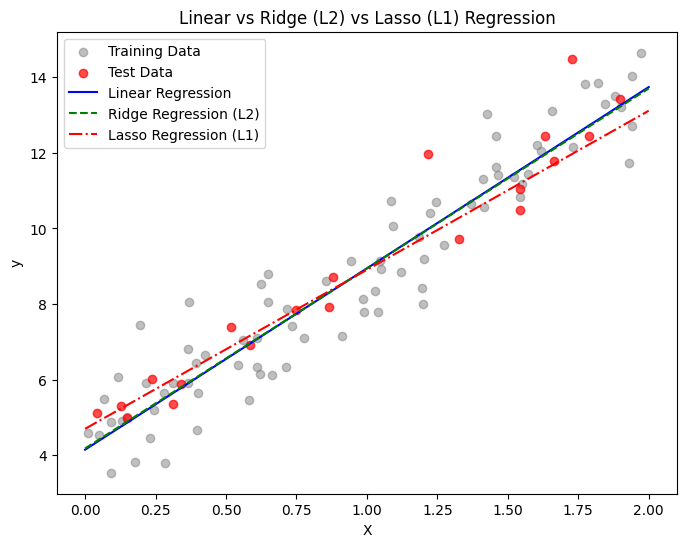

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split

# Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 5 * X + np.random.randn(100, 1)  # y = 4 + 5x + noise

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train different regression models
lin_reg = LinearRegression()
ridge_reg = Ridge(alpha=0.2)  # L2 regularization
lasso_reg = Lasso(alpha=0.2)  # L1 regularization

lin_reg.fit(X_train, y_train)
ridge_reg.fit(X_train, y_train)
lasso_reg.fit(X_train, y_train)

# Predictions for plotting
X_plot = np.linspace(0, 2, 100).reshape(-1, 1)
y_pred_lin = lin_reg.predict(X_plot)
y_pred_ridge = ridge_reg.predict(X_plot)
y_pred_lasso = lasso_reg.predict(X_plot)

# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(X_train, y_train, color='gray', alpha=0.5, label="Training Data")
plt.scatter(X_test, y_test, color='red', alpha=0.7, label="Test Data")
plt.plot(X_plot, y_pred_lin, "b-", label="Linear Regression")
plt.plot(X_plot, y_pred_ridge, "g--", label="Ridge Regression (L2)")
plt.plot(X_plot, y_pred_lasso, "r-.", label="Lasso Regression (L1)")

plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title("Linear vs Ridge (L2) vs Lasso (L1) Regression")
plt.show()


In [4]:
# For this generated data, create the lasso regression and ridge regression
# Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(1000, 1)
y = 3 + 2 * X + np.random.randn(1000, 1)  # y = 4 + 5x + noise
